# <center>Блок 4. Введение в машинное обучение<center>
## <center>ML-4. Обучение без учителя: кластеризация и техника понижения размерности<center>
### <center>1.Введение<center>
### <center>2.Введение в обучение без учителя. Базовая кластеризация<center>
#### <center>Алгоритм k-means<center>

In [1]:
# Импортируем бибилиотеку pandas для работы с датафреймами
import pandas as pd
# Импортируем seaborn для визуализации
import seaborn as sns
# Импортируем sklearn для кластеризации
from sklearn.cluster import KMeans

# Загружаем данные
df = pd.read_csv('C:\IDE\data\Block_4\pokemon.csv')
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

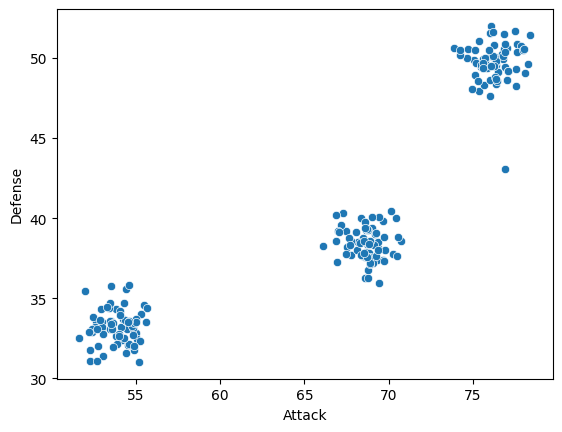

In [2]:
# Кластеризуем покемонов по их силе атаки и уровню защиты
# Сохраним в матрицу X интересующие нас признаки: атаку и защиту
X = df[['Attack', 'Defense']]

# Визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

<Axes: xlabel='Attack', ylabel='Defense'>

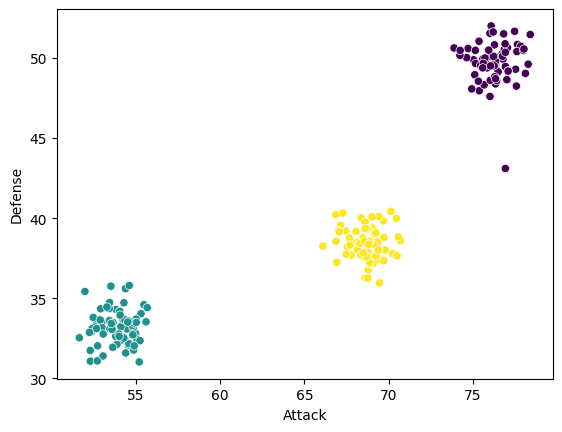

In [3]:
# Инициализируем алгоритм k-means с 3 кластерами
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)

# Обучаем модель
kmeans.fit(X)
# Предскажем кластеры
predictions = kmeans.predict(X)
# Если хотим получить метки классов, для тех же данных, на которых обучиили модель, можно запросить labels
predictions = kmeans.labels_
# Сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

# Визуализируем результаты
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

<Axes: xlabel='Attack', ylabel='Defense'>

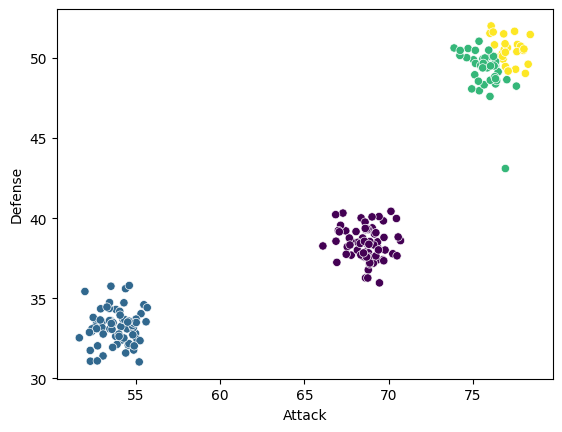

In [4]:
# Инициализируем алгоритм k-means с 3 кластерами
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    random_state=42
)

# Обучаем модель
kmeans.fit(X)
# Предскажем кластеры
predictions = kmeans.predict(X)
# Если хотим получить метки классов, для тех же данных, на которых обучиили модель, можно запросить labels
predictions = kmeans.labels_
# Сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

# Визуализируем результаты
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

In [5]:
# Добавляем третий признак
X = df[['Attack', 'Defense', 'Speed']]
# Инициализируем аалгоритм k-means с 3 кластерами
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)

# Обучаем модель
kmeans.fit(X)
# Делаем предсказание
predictions = kmeans.predict(X)

#### Определение оптимального k для алгоритма k-means

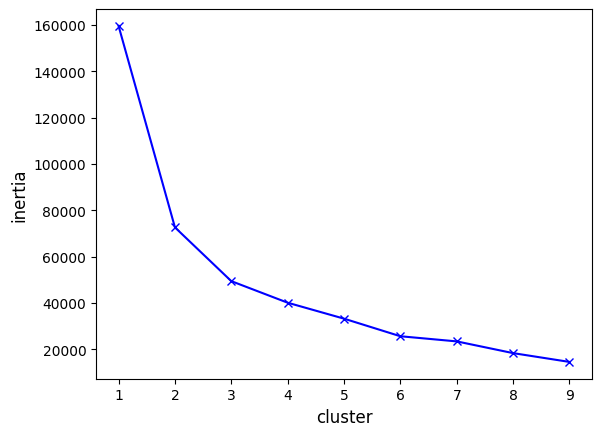

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Функция принимает количество кластеров для k-means и матрицу с признаками и возвращает инерцию
def get_inertia(cluster_num, X):
    # Инициализируем алгоритм кластеризации
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    # Обучаем алгоритм
    k_means.fit(X)
    # Находим значение инерции
    inertia = k_means.inertia_
    # Возвращаем значение
    return inertia

# Создаем пустой список для значений инерции
inertia = []
# Итерируемся по разным размерам кластера (1 до 9) и сохраняем инерцию для каждого
for cluster_num in range(1,10):
    # Сохраняем значения
    inertia.append(get_inertia(cluster_num, X))
    
# Строим визуализацию
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')    

<Axes: xlabel='cluster', ylabel='silhouette'>

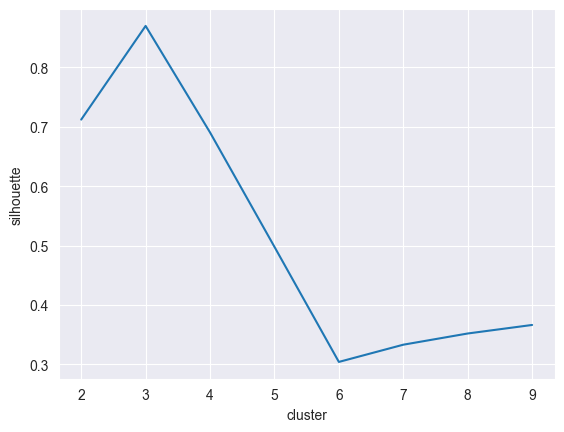

In [7]:
# Импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# Напишем функцию как при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    # Подсчитаем метрику силуэта
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# Создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}
# Выберем нужные данные
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)

# Сохраним в DataFrame значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# Визуализируем
sns.set_style('darkgrid')
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", markers='o')

<Axes: xlabel='cluster', ylabel='silhouette'>

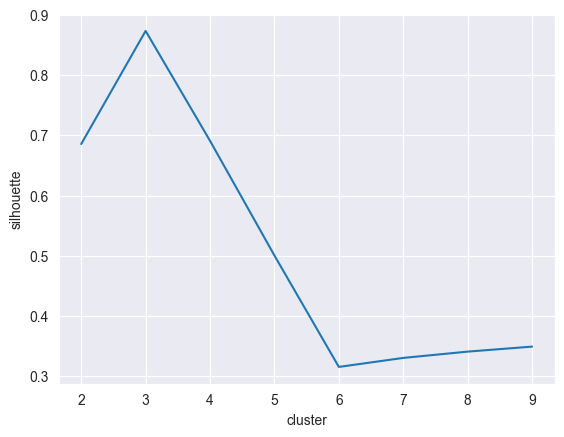

In [8]:
# Задание 2.7
data = pd.read_csv('C:\\IDE\\data\\Block_4\\values_from_the_instrument.csv')

def get_silhouette(cluster_num, data):
    kmeans = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data)
    silhouette = silhouette_score(data, kmeans.predict(data))
    return silhouette

silhouette_dict = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_dict['silhouette'].append(get_silhouette(cluster_num, data))
    silhouette_dict['cluster'].append(cluster_num)
    
silhouette_df = pd.DataFrame(silhouette_dict)

sns.set_style('darkgrid')
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", markers='0')

### <center>3.Метрики<center>
#### Однородность кластеров (homogeneity score)

In [9]:
# Импортируем подсчет метрики однородности классов
from sklearn.metrics.cluster import homogeneity_score

# Передаем предсказанную информацию и правильные ответы
print(homogeneity_score(labels_true=[0,0,1,1], labels_pred=[0,0,1,1]))
print(homogeneity_score(labels_true=[0,0,1,1], labels_pred=[1,1,0,0]))

1.0
1.0


In [10]:
# Передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказаний
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


#### Полнота кластера (completeness score)

In [11]:
# Импортируем метрику полноты
from sklearn.metrics.cluster import  completeness_score

# Передаем предсказанную информацию и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0,0,1,1], labels_pred=[0,0,1,1,])

1.0

In [12]:
# Подсчитаем полноту кластеров с покемонами на 3 кластерах
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# Подсчитаем полноту кластеров с покемонами на 4 кластерах
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.8334191510029214


#### V-мера (V-measure)

In [13]:
# Импортируем подсчет v-меры
from sklearn.metrics import v_measure_score

# Подсчитаем v-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9091419717602737


#### Индекс Рэнда

In [14]:
# Импортируем из библиотеки sklearn подсчет индекса Рэнда
from sklearn.metrics.cluster import rand_score

# Передаем в rand_score размеченные и предсказанные данные
rand_score([0,0,1,1], [0,0,1,1])

1.0

In [15]:
# Задание 3.3
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]),2))

0.74


### <center>4.Иерархическая кластеризация<center>
#### <center>Иерархическая кластеризация<center>

In [16]:
# Задание 4.1
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

### <center>5.EM-алгоритмы кластеризации<center>

In [17]:
# Импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# Обучаем модель
gm_clustering.fit(X)
# Делаем предсказание
gm_prediction = gm_clustering.predict(X)

[1 0 0 ... 2 2 0]


<Axes: xlabel='year', ylabel='price'>

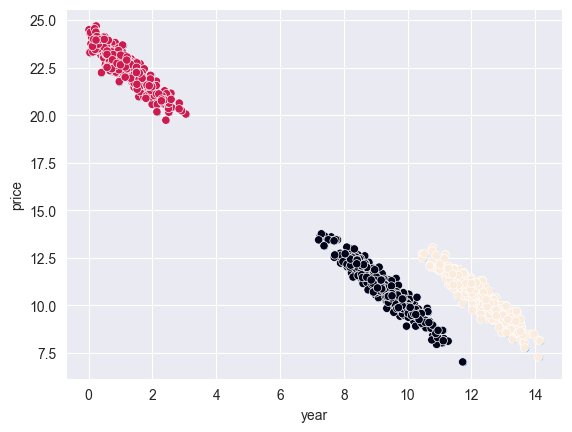

In [18]:
# Задание 5.4
housing_data = pd.read_csv('C:\IDE\data\Block_4\housing.csv')

sns.scatterplot(x=housing_data.year, y=housing_data.price)

gm_clustering = GaussianMixture(n_components=3 ,random_state=42)
gm_clustering.fit(housing_data)
gm_prediction = gm_clustering.predict(housing_data)
print(gm_prediction)

sns.scatterplot(x=housing_data.year, y=housing_data.price, c=gm_prediction)

<Axes: xlabel='year', ylabel='price'>

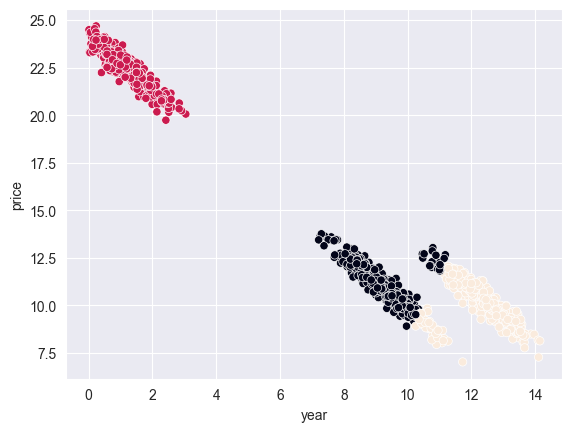

In [19]:
# Задание 5.5
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)

kmeans.fit(housing_data)
predictions = kmeans.predict(housing_data)

sns.scatterplot(x=housing_data.year, y=housing_data.price, c=predictions)

### <center>6.Спектральная кластеризация<center>

In [20]:
# Импортируем из sklearn SpectralClustering
from sklearn.cluster import SpectralClustering

# Запускаем кластеризацию, количество кластеров равное 3
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)
spectral_clustering.fit(df[['Attack', 'Defense']])
# Получаем результаты кластеризации
spectral_pedictions = spectral_clustering.labels_

### <center>7.Кластеризация на основе плотности<center>
#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

<Axes: xlabel='Attack', ylabel='Defense'>

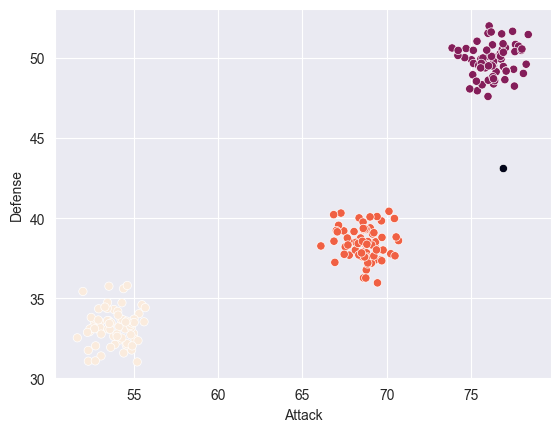

In [21]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])
# Визуализируем результаты
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

In [22]:
housing_data.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<Axes: xlabel='year', ylabel='price'>

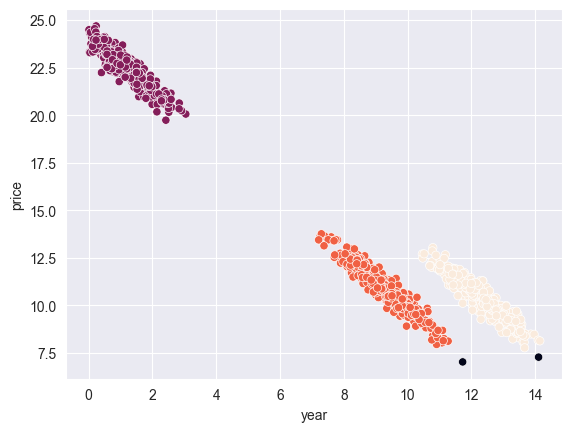

In [23]:
# Задание 7.5
clustering_houses = DBSCAN().fit(housing_data)

sns.scatterplot(x=housing_data.year, y=housing_data.price, c=clustering_houses.labels_)

<Axes: xlabel='year', ylabel='price'>

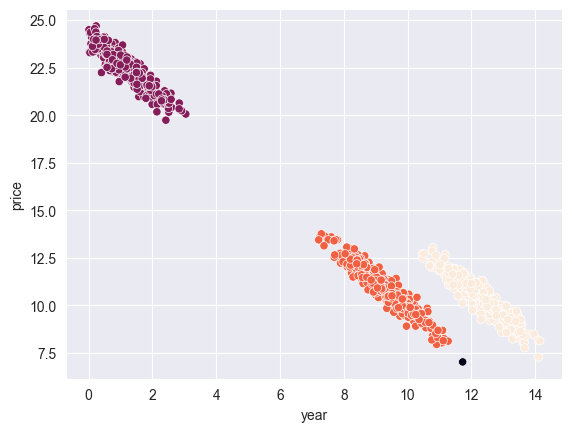

In [24]:
# Задание 7.6
clustering_houses = DBSCAN(eps=0.7, min_samples=6).fit(housing_data)

sns.scatterplot(x=housing_data.year, y=housing_data.price, c=clustering_houses.labels_)

### <center>8.Визуализация результатов кластеризации<center>

In [25]:
# Импортируем библиотеки, которые нам понадобятся для работы с датафреймом, кластеризацией и визуализацией
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('C:\\IDE\\data\\Block_4\\airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<Axes: xlabel='latitude', ylabel='longitude'>

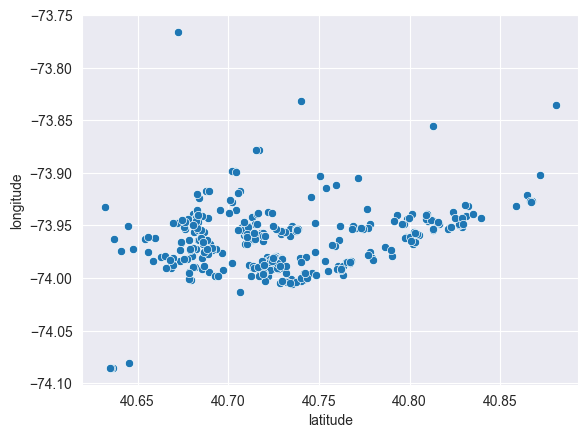

In [26]:
sns.scatterplot(x=df.latitude, y=df.longitude)

#### <center>2D-визуализация кластеров и центроидов<center>

In [27]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

In [28]:
df['cen_x'] = df.clusters.map(centroids_x_dict)
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,40.677152,-73.966752,#DF2020
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5,40.767922,-73.973999,#DF8520
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2,40.819038,-73.942935,#2095DF
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,40.677152,-73.966752,#DF2020
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2,40.819038,-73.942935,#2095DF


<Axes: xlabel='latitude', ylabel='longitude'>

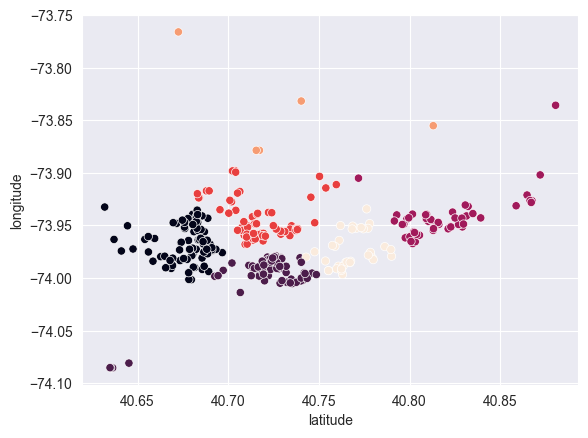

In [29]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.clusters)

<Axes: xlabel='latitude', ylabel='longitude'>

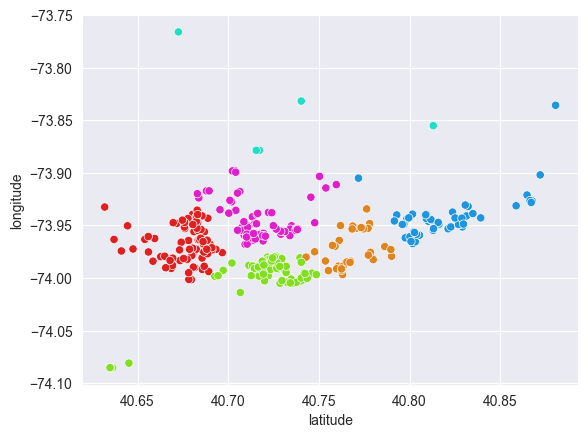

In [30]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color)

<Axes: xlabel='latitude', ylabel='longitude'>

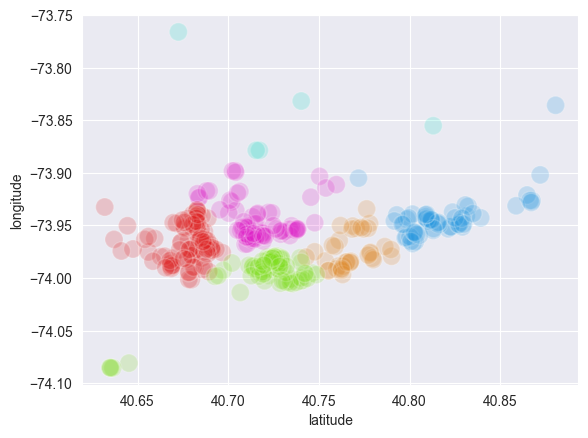

In [31]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.2, s=170)

<Axes: xlabel='latitude', ylabel='longitude'>

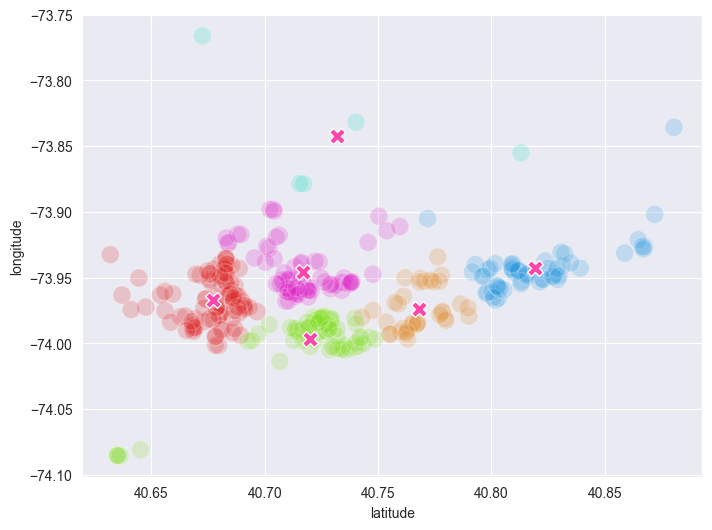

In [32]:
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.2, s=170)
# Визуализируем центроиды: отметим их крестиками и зададим розовый цвет
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

#### <center>Convex Hull<center>

In [33]:
from scipy.spatial import ConvexHull 

points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

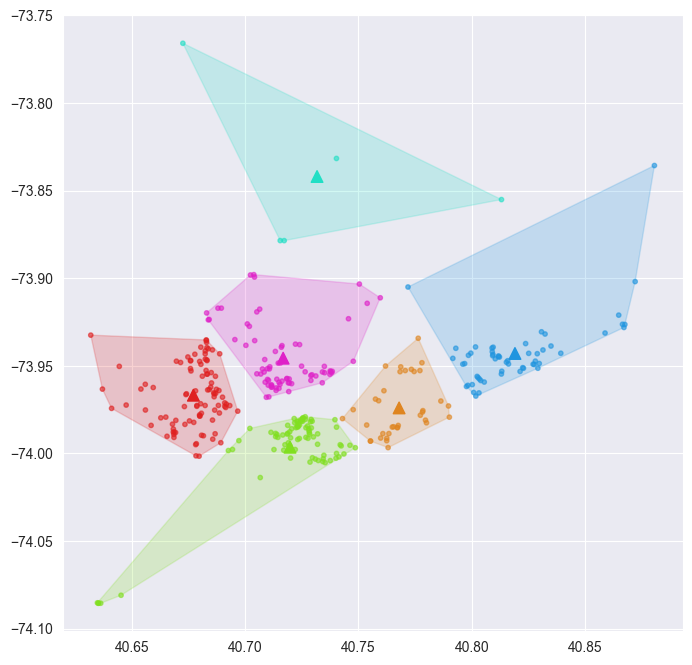

In [34]:
from scipy.spatial import ConvexHull
import numpy as np

fig,ax = plt.subplots(1, figsize=(8,8))
# Визуализируем обьекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha=0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# Найдем уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
    hull = ConvexHull(points)
    # запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку
    # так как оболочка должна быть замкнутой, то в конце добавляем еще раз нулевой элемент
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull  =np.append(points[hull.vertices, 1], points[hull.vertices ,1][0])
    
    # рисуем оболочку и заливаем ее таким же цветом, как и обьекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

#### <center>Дендограмма<center>

In [36]:
# Импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# Запускаем кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')
# Обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

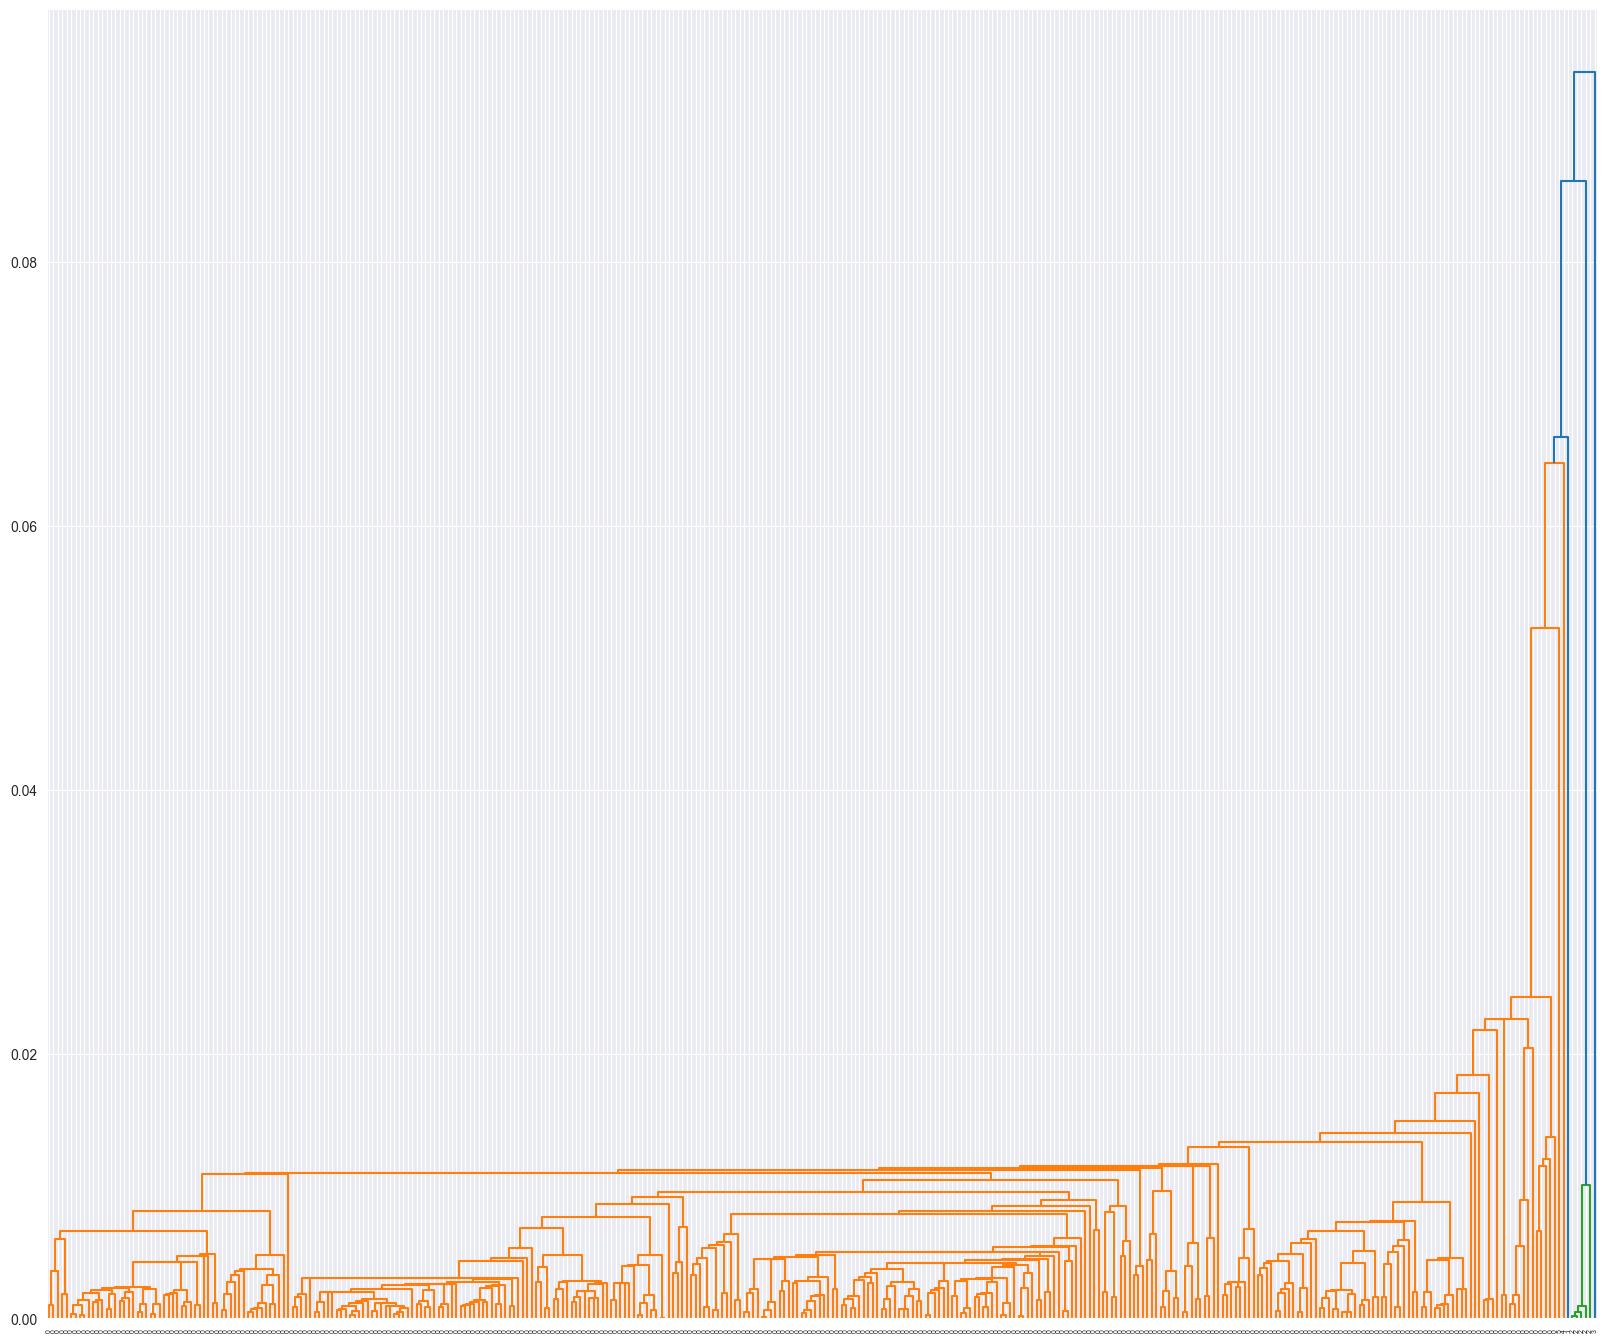

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Рассчитаем расстояние между кластерами
linked = linkage(df[['latitude', 'longitude']], 'single')
plt.figure(figsize=(20,17))

# Визуализируем дендограмму с ориентацией top
# Сначала будут отрисовываться кластеры с минимальным расстоянием
dendrogram(Z=linked,
           orientation='top',
           labels=predictions_ag_model,
           distance_sort='descending')

plt.show()

#### <center>Clustergram<center>

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.016 seconds.
K=3 fitted in 0.004 seconds.
K=4 fitted in 0.004 seconds.
K=5 fitted in 0.002 seconds.
K=6 fitted in 0.007 seconds.
K=7 fitted in 0.002 seconds.
K=8 fitted in 0.003 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

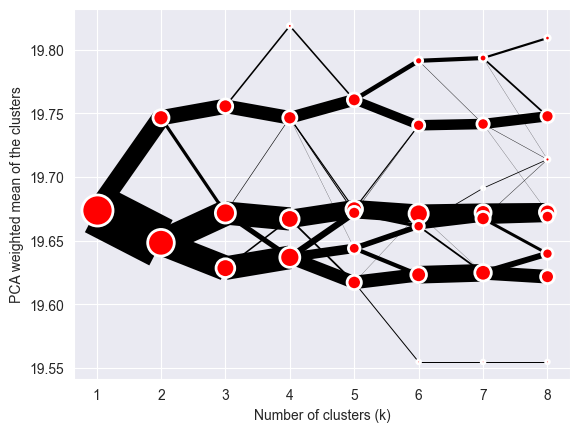

In [38]:
# Импортируем библиотеку clustergram
from clustergram import Clustergram

# Задаем количество кластеров, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')
# Запускаем алгоритм
cgram.fit(df[['latitude', 'longitude']])
cgram.plot()

#### <center>3D-визуализация<center>

In [39]:
# Инициализируем k-means-кластеризацию с шестью признаками
kmeans_clustering = KMeans(n_clusters=6)
# Обучим k-means-модель кластеризации и сохраним результат в переменную
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])
# Сохраним предсказание в новый признак
df["clusters_3d"] = kmeans_predictions

Text(0.5, 0, 'price')

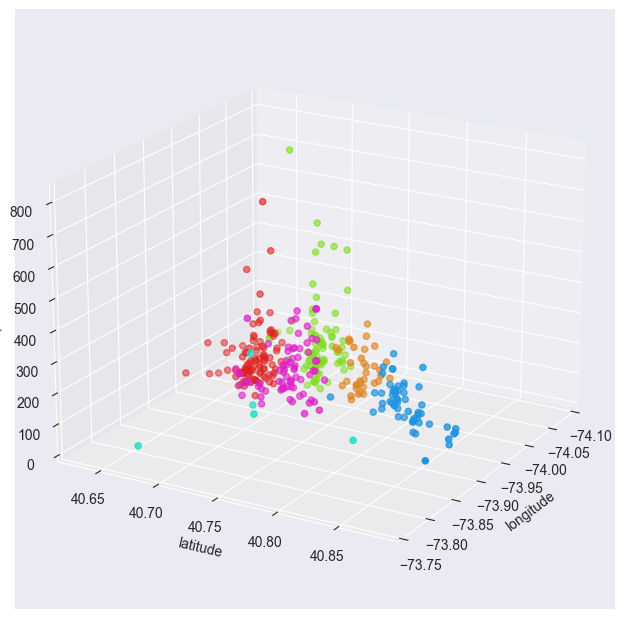

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем трехмерный обьект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# Добавляем дополнительную ось в обьект картинки
fig.add_axes(ax)
ax.azim = 30
ax.elev = 20
# Визуализируем данные, передав значения x, y, z, а также группировку данных по цветам
ax.scatter(xs=df.longitude.to_list(), ys=df.latitude.to_list(), zs=df.price.to_list(), c=df.color)
# Добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [43]:
import plotly
import plotly.express as px

# Передаем датафрейм и поля для осей абсцисс, ординат и аппликат
# В значение color передаем номера кластеров
fig = px.scatter_3d(
    data_frame=df,
    x='longitude',
    y='latitude',
    z='price',
    color='clusters',
    width=1000,
    height=700
)
fig.show()

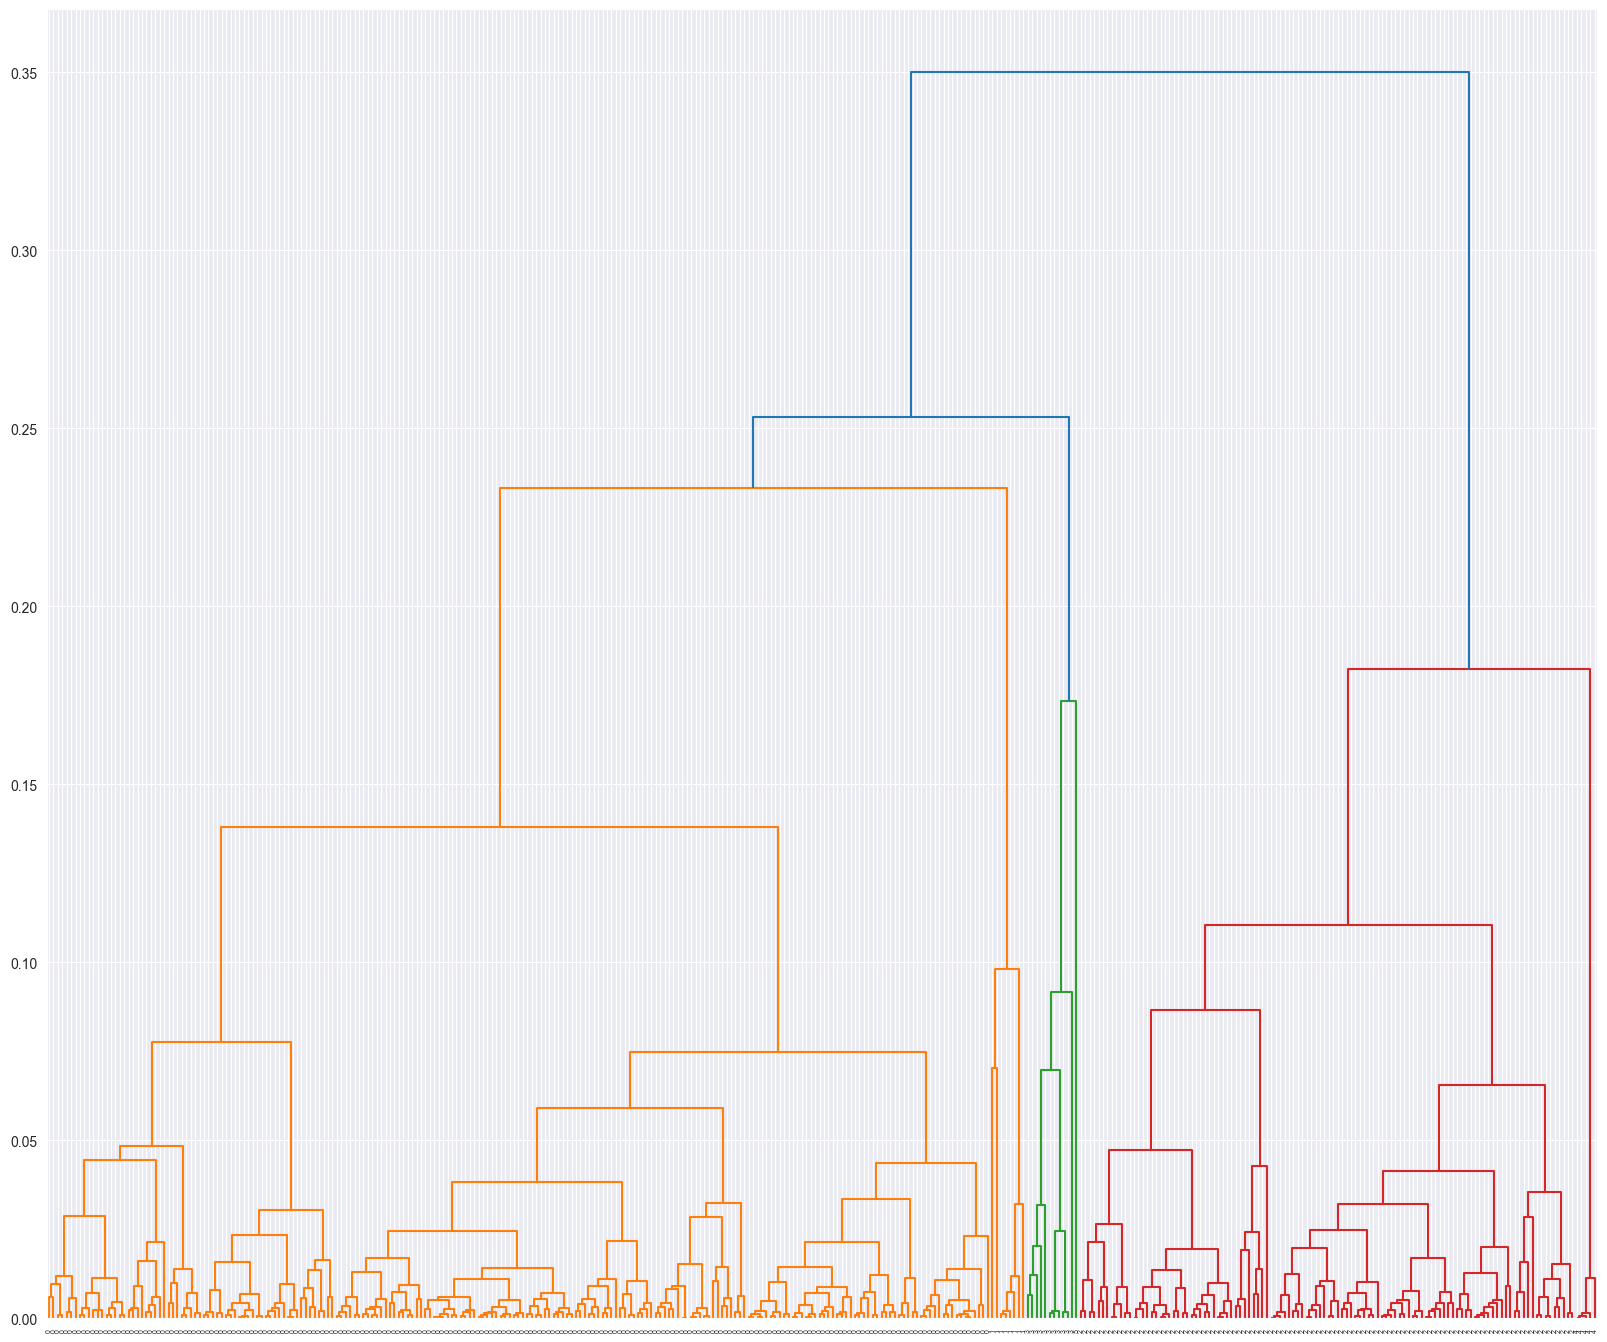

In [44]:
# Задание 8.4
# Запускаем кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')
# Обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

# Рассчитаем расстояние между кластерами
linked = linkage(df[['latitude', 'longitude']], 'complete')
plt.figure(figsize=(20,17))

# Визуализируем дендограмму с ориентацией top
# Сначала будут отрисовываться кластеры с минимальным расстоянием
dendrogram(Z=linked,
           orientation='top',
           labels=predictions_ag_model,
           distance_sort='descending')

plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

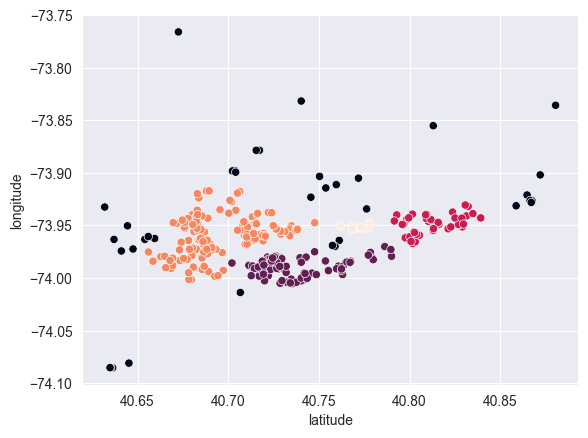

In [50]:
# Задание 8.5

# Запускаем кластеризацию
clustering = DBSCAN(eps=0.012, min_samples=6).fit(df[['latitude', 'longitude']])
# Визуализируем результаты
sns.scatterplot(x=df.latitude, y=df.longitude, c=clustering.labels_)

### <center>9.PCA и t-SNE, или зачем понижать размерность?<center>
#### <center>PCA<center>